<a href="https://colab.research.google.com/github/nick01as/AI-ML-starter-kit/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TritonHacks 2025: Introduction to AI/ML Starter Kit Part I: Exploratory Data Analysis (EDA)

Welcome to the Intro to AI/ML Starter Kit for TritonHacks 2025! This is the first of two notebooks in this repo, and it focuses on EDA.

In [ ]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Create a new file in drive named "AI-ML-StarterKit" and place the downloaded Kaggle dataset in the folder

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AI-ML-StarterKit/healthcare-dataset-stroke-data.csv')
df.head()

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Independent And Dependent Variables
df = pd.read_csv('/content/drive/MyDrive/AI-ML-StarterKit/healthcare-dataset-stroke-data.csv')

dependent_var = 'stroke'
independent_vars = [col for col in df.columns if col != dependent_var]

print("Target Output: ", dependent_var)
print("Feature Inputs: ", independent_vars)


Target Output:  stroke
Feature Inputs:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


<ipython-input-22-5d26addabae8>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(x * 100)}%' for x in plt.gca().get_yticks()])


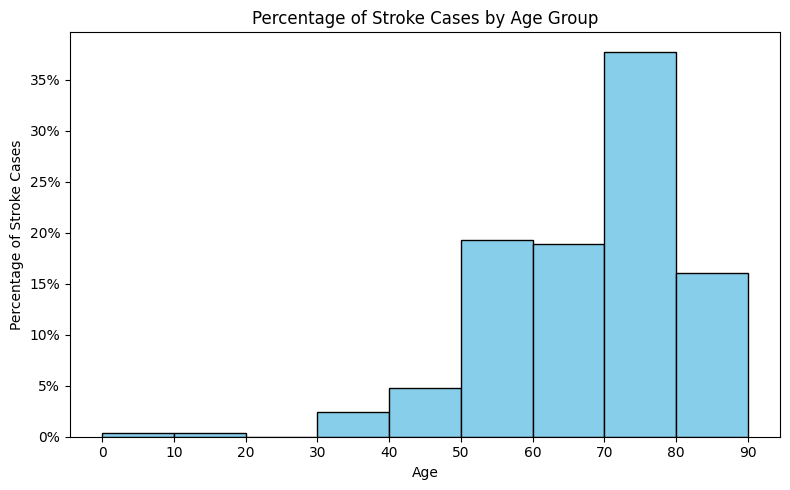

In [ ]:
# Age v. Frequency Of Strokes

stroke_df = df[df['stroke'] == 1]

plt.figure(figsize=(8, 5))

weights = [1 / len(stroke_df)] * len(stroke_df)

plt.hist(stroke_df['age'], bins=range(0, 91, 10), weights=weights,
         edgecolor='black', color='skyblue')

plt.title('Percentage of Stroke Cases by Age Group')
plt.xlabel('Age')
plt.ylabel('Percentage of Stroke Cases')
plt.xticks(range(0, 91, 10))


plt.gca().set_yticklabels([f'{int(x * 100)}%' for x in plt.gca().get_yticks()])

plt.tight_layout()
plt.show()

<ipython-input-23-bd997bb4ab3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')


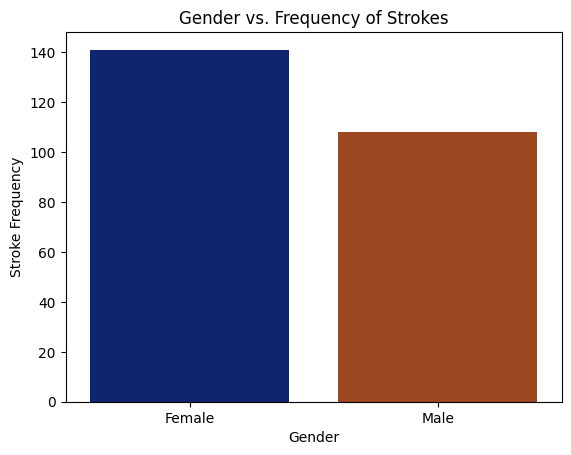

In [ ]:
# Gender v. Frequency Of Strokes (Bar Graph)

grouped_data = df[df['stroke'] == 1].groupby('gender')['stroke'].count().reset_index()
sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')
plt.title('Gender vs. Frequency of Strokes')
plt.xlabel('Gender')
plt.ylabel('Stroke Frequency')
plt.show()

<ipython-input-24-60e5a27a05d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')


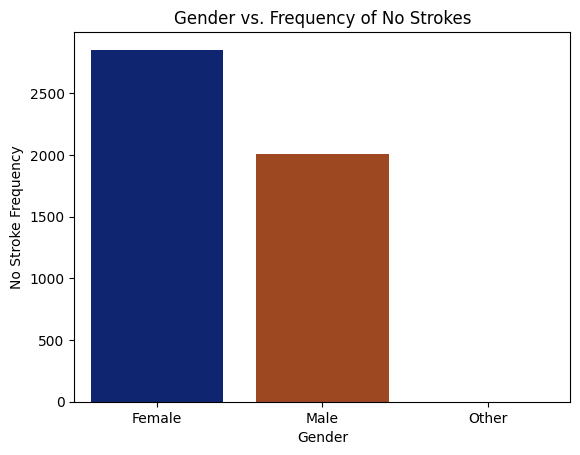

In [ ]:
# Gender v. Frequency Of No Strokes (Bar Graph)

grouped_data = df[df['stroke'] == 0].groupby('gender')['stroke'].count().reset_index()
sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')
plt.title('Gender vs. Frequency of No Strokes')
plt.xlabel('Gender')
plt.ylabel('No Stroke Frequency')
plt.show()


<ipython-input-25-ff2778f25b3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette = 'dark')


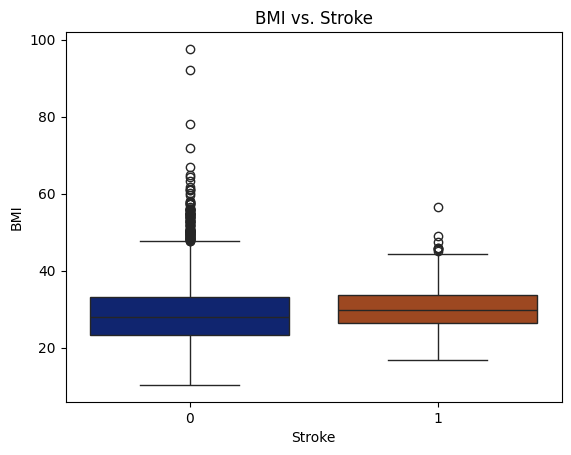

In [ ]:
# Boxplot For BMI

sns.boxplot(data=df, x='stroke', y='bmi', palette = 'dark')
plt.title('BMI vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

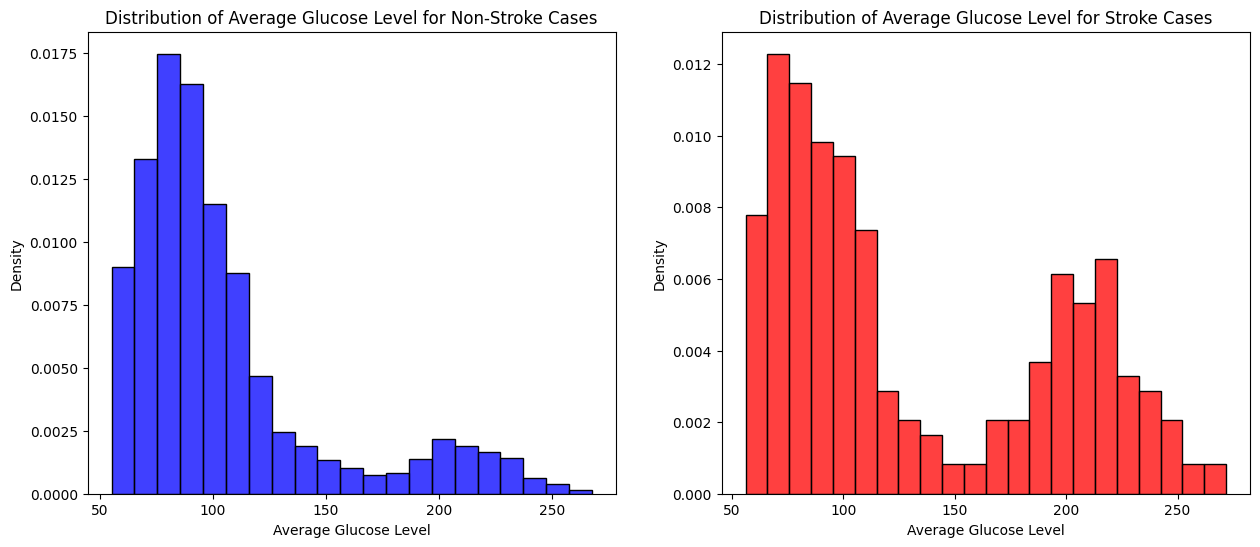

In [ ]:
# Distribution for Average Glucose Level For Stroke, Non-Stroke Cases

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data = df.loc[df['stroke'] == 0], x = 'avg_glucose_level', stat = 'density', binwidth = 10, color = 'blue', ax = axes[0])
sns.histplot(data = df.loc[df['stroke'] == 1], x = 'avg_glucose_level', stat = 'density', binwidth = 10, color = 'red', ax = axes[1])

axes[1].set_title('Distribution of Average Glucose Level for Stroke Cases')
axes[1].set_xlabel('Average Glucose Level')
axes[1].set_ylabel('Density')

axes[0].set_title('Distribution of Average Glucose Level for Non-Stroke Cases')
axes[0].set_xlabel('Average Glucose Level')
axes[0].set_ylabel('Density')

plt.show()

<ipython-input-27-69bb11e70adc>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', palette = 'dark')


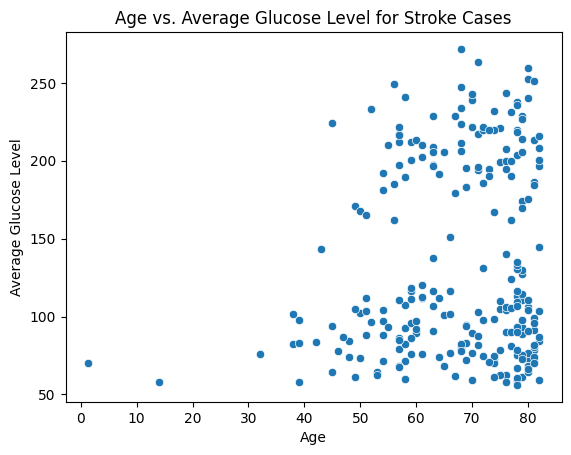

In [ ]:
# Scatterplot for Age v. Average Glucose Level

stroke_data = df.loc[df['stroke'] == 1]

sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', palette = 'dark')
plt.title('Age vs. Average Glucose Level for Stroke Cases')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

<ipython-input-28-34c18dd400d8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=age_minmax, y=glucose_minmax, palette = 'dark')


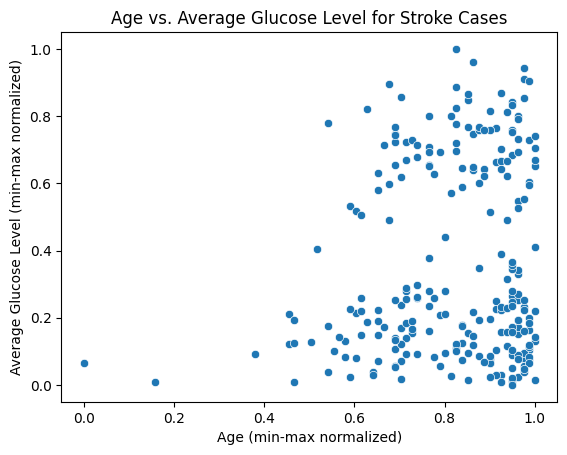

In [ ]:
# Scatterplot for Age v. Average Glucose Level (with Min-Max Scaling)

age_minmax = (stroke_data['age'] - stroke_data['age'].min()) / (stroke_data['age'].max() - stroke_data['age'].min())
glucose_minmax = (stroke_data['avg_glucose_level'] - stroke_data['avg_glucose_level'].min()) / (stroke_data['avg_glucose_level'].max() - stroke_data['avg_glucose_level'].min())
sns.scatterplot(x=age_minmax, y=glucose_minmax, palette = 'dark')

plt.title('Age vs. Average Glucose Level for Stroke Cases')
plt.xlabel('Age (min-max normalized)')
plt.ylabel('Average Glucose Level (min-max normalized)')
plt.show()

<ipython-input-29-cac549b8ff08>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=age_zscore, y=glucose_zscore, palette = 'dark')


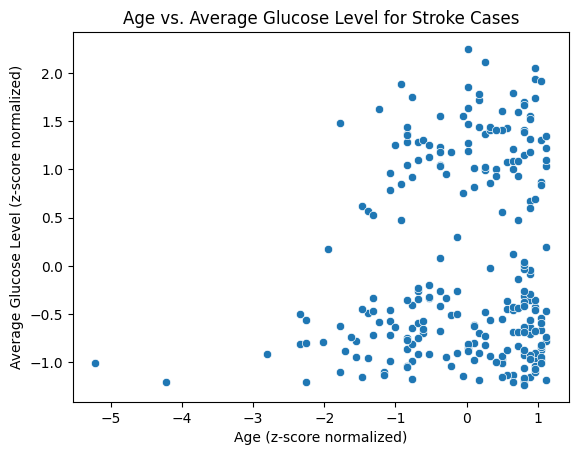

In [ ]:
# Scatterplot for Age v. Average Glucose Level (with Z-Score Scaling)

age_zscore = (stroke_data['age'] - stroke_data['age'].mean()) / stroke_data['age'].std()
glucose_zscore = (stroke_data['avg_glucose_level'] - stroke_data['avg_glucose_level'].mean()) / stroke_data['avg_glucose_level'].std()
sns.scatterplot(x=age_zscore, y=glucose_zscore, palette = 'dark')

plt.title('Age vs. Average Glucose Level for Stroke Cases')
plt.xlabel('Age (z-score normalized)')
plt.ylabel('Average Glucose Level (z-score normalized)')
plt.show()

In [ ]:
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Let's do group-wise median imputation for the `bmi` column since there are outliers in the `bmi` distribution among both stroke and non-stroke cases.